<center><h1>Tugas 1</h1></center>

<center><h2>Perolehan Informasi 2021/2022</h2></center>

In [ ]:
#Input NPM
Nama = "Naufal Hilmi Irfandi"

#Input NPM
NPM = "1806186673"

In [ ]:
!pip install PySastrawi
!pip install stanza

     |████████████████████████████████| 210 kB 7.5 MB/s 
     |████████████████████████████████| 432 kB 9.8 MB/s 
     |████████████████████████████████| 170 kB 52.0 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=23c5ce32e4c1d22f4eb7c7ae4cebb1623a9cc3784b961ac7e6d9759de33ebc99
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import stanza

In [ ]:
!gdown --id 19wsxTWWkGaI-3GxBx-m32iBBOvoGX2ZC
!gdown --id 1WgVrGhsbEmotkRTUZ47Plf17Z8u-qSfQ

Downloading...
From: https://drive.google.com/uc?id=19wsxTWWkGaI-3GxBx-m32iBBOvoGX2ZC
To: /content/Korpus.json
100% 3.01M/3.01M [00:00<00:00, 93.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WgVrGhsbEmotkRTUZ47Plf17Z8u-qSfQ
To: /content/Korpus_Ringkas.json
100% 62.5k/62.5k [00:00<00:00, 57.3MB/s]


In [ ]:
df_korpus = pd.read_json('Korpus.json')

In [ ]:
df_korpus_ringkas = pd.read_json('Korpus_Ringkas.json')

# Corpus Statistics (25 Poin)

## Nomor 1

In [ ]:
len(df_korpus)

1051

Terdapat 1051 data pada Korpus.json

## Nomor 2

### a

In [ ]:
df_korpus['section'].nunique()

6

In [ ]:
df_korpus['section'].unique()

array(['ekonomi', 'nasional', 'internasional', 'teknologi', 'hiburan',
       'olahraga'], dtype=object)

Terdapat 6 data unik pada attribut "section". Data unik tersebut yaitu ekonomi, nasional, internasional, teknologi, hiburan, dan olahraga.

### b

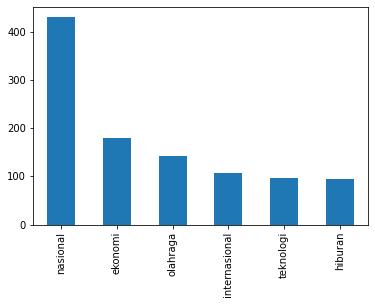

In [ ]:
df_korpus['section'].value_counts().plot(kind='bar')

## Nomor 3

In [ ]:
content = df_korpus['content']

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Akan dilakukan tokenisasi menggunakan library nltk dengan fungsi word_tokenize pada attribute content dari data korpus.

In [ ]:
content_tokenize = content.apply(nltk.word_tokenize)

0    [Kepala, BPH, Migas, M., Fashurullah, Asa, men...
1    [Gerakan, Nasional, Pengawal, Fatwa, (, GNPF, ...
2    [Kementerian, Perdagangan, Amerika, Serikat, m...
3    [Pertanyaan, :, Apa, penyebab, transmisi, mati...
4    [Aktris, Felicity, Jones, turut, mengenang, so...
5    [Presiden, Donald, Trump, menegaskan, bakal, m...
6    [Duta, Besar, RI, untuk, Amerika, Serikat, (, ...
7    [MotoGP, 2020akan, memasuki, seri, ketujuh, ya...
8    [Laga, Manchester, Unitedvs, Crystal, Palace, ...
9    [Arsenal, menang, 2-1, atas, West, Ham, United...
Name: content, dtype: object

Melakukan pembersihan terhadap token yang berupa punctuation dengan cara melakukan iterasi terhadap hasil token raw.

In [ ]:
token_wo_punc = []
for i in content_tokenize:
    token_wo_punc.append([word for word in i if word.isalnum()])

0    [Kepala, BPH, Migas, Fashurullah, Asa, mengada...
1    [Gerakan, Nasional, Pengawal, Fatwa, GNPF, Ula...
2    [Kementerian, Perdagangan, Amerika, Serikat, m...
3    [Pertanyaan, Apa, penyebab, transmisi, matic, ...
4    [Aktris, Felicity, Jones, turut, mengenang, so...
5    [Presiden, Donald, Trump, menegaskan, bakal, m...
6    [Duta, Besar, RI, untuk, Amerika, Serikat, AS,...
7    [MotoGP, 2020akan, memasuki, seri, ketujuh, ya...
8    [Laga, Manchester, Unitedvs, Crystal, Palace, ...
9    [Arsenal, menang, atas, West, Ham, United, dal...
dtype: object

Mengumpulkan data unik setiap token dan menghitung jumlah dari setiap kata yang nanti akan dijadikan data untuk membuat histogram.

In [ ]:
word_dict = {}
for i in token_wo_punc:
    for j in i:
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] = word_dict[j] + 1 

word = pd.DataFrame(list(word_dict.items()),columns = ['Kata','Sum'])
sorted_word = word.sort_values(by='Sum', ascending=False)
sorted_word.reset_index(inplace = True, drop = True)

,Kata,Sum
0,yang,8161
1,di,6744
2,dan,6672
3,itu,3391
4,dengan,3194
...,...,...
24157,Pengerahan,1
24158,bernyawa,1
24159,Agensi,1
24160,Horipro,1


### a

Melihat jumlah kata unik dari hasil tokenisasi yang dilakukan sebelumnya.

In [ ]:
sorted_word.nunique()[0]

24162

### b

Membuat histogram untuk 100 data terbanyak yang ada di hasil tokenisasi.

In [ ]:
sorted_100 = sorted_word.head(100)

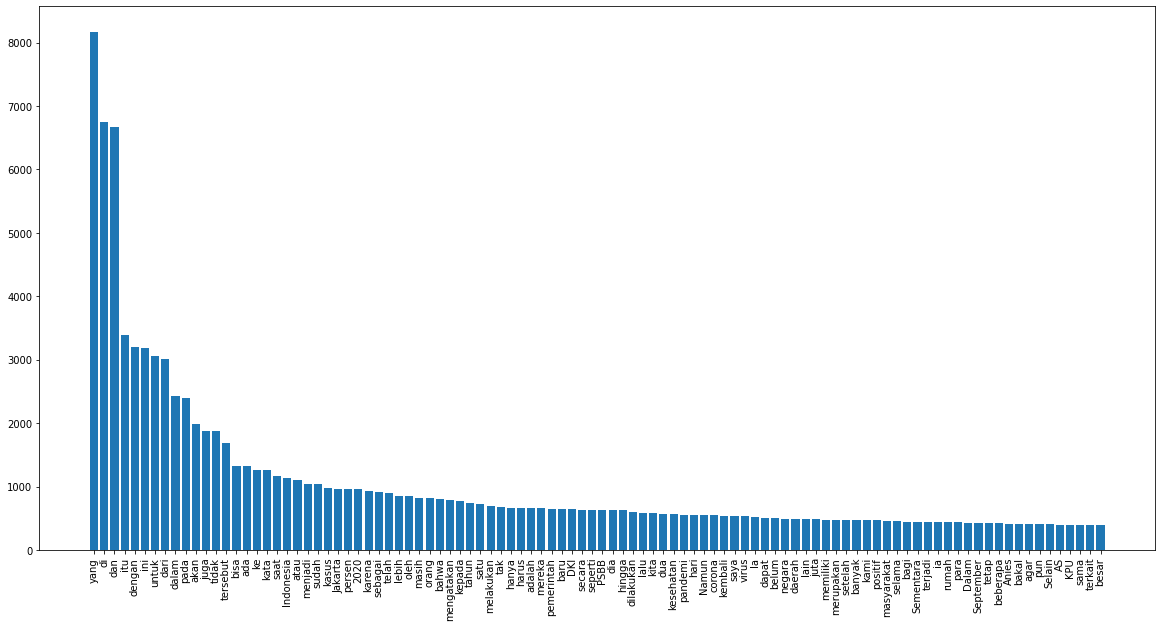

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(sorted_100['Kata'], sorted_100['Sum'])
plt.xticks(rotation=90)
plt.show()

### c

Menentukan jumlah terbanyak dari kata bigrams dimana bigram merupakan kombinasi tuple dari setiap token yang ada di hasil tokenisasi sebelumnya.

In [ ]:
bigrams_wo_punc = []
for i in token_wo_punc:
    bigrams_wo_punc.append(list(nltk.bigrams(i)))

In [ ]:
bigrams_dict = {}
for i in bigrams_wo_punc:
    for j in i:
        if j not in bigrams_dict.keys():
            bigrams_dict[j] = 1
        else:
            bigrams_dict[j] = bigrams_dict[j] + 1 

bigrams = pd.DataFrame(list(bigrams_dict.items()),columns = ['Kata','Sum'])
sorted_bigrams = bigrams.sort_values(by='Sum', ascending=False)
sorted_bigrams.reset_index(inplace = True, drop = True)

Menunjukan data bigrams terbanyak dalam hasil tokenisasi.

In [ ]:
sorted_bigrams.head(10)

,Kata,Sum
0,"(saat, ini)",471
1,"(DKI, Jakarta)",447
2,"(virus, corona)",403
3,"(salah, satu)",258
4,"(Selain, itu)",254
5,"(di, Indonesia)",246
6,"(protokol, kesehatan)",234
7,"(berada, di)",232
8,"(Video, CNN)",211
9,"(Gambas, Video)",211


## Nomor 4

Melakukan tokenisasi pada attribute originalTitle dan juga membersihkan hasil tokenisasi dari punctuation.

In [ ]:
oriTitle = df_korpus['originalTitle']

In [ ]:
oriTitle_tokenize = oriTitle.apply(nltk.word_tokenize)

In [ ]:
oriTitle_wo_punc = []
for i in oriTitle_tokenize:
    oriTitle_wo_punc.append([word for word in i if word.isalnum()])

### a

Menghitung rata-rata jumlah kata pada original title dengan cara melihat berapa banyak hasil tokenisasi dari setiap titlenya.

In [ ]:
len_oriTitle = []
for i in oriTitle_wo_punc:
    len_oriTitle.append(len(i))

In [ ]:
avg = np.mean(len_oriTitle)
avg

8.097050428163653

### b

Membuat world cloud dari hasil tokenisasi yang akan memperlihatkan kata apa yang paling banyak dalam tokenisasi.

In [ ]:
all_word_title = []
for i in oriTitle_wo_punc:
    all_word_title += i

all_word = ' '.join(all_word_title)

(-0.5, 399.5, 199.5, -0.5)

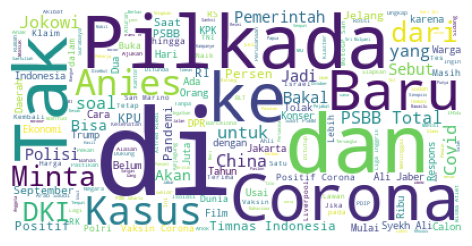

In [ ]:
wordcloud = WordCloud(background_color = 'white').generate(all_word)
plt.figure(figsize=(6, 3), dpi = 100, facecolor='w', edgecolor='k')
plt.imshow(wordcloud)
plt.axis('off')

# B - Regex (25 Poin)

In [ ]:
content_regex = df_korpus['content']

## Nomor 1

Menggunakan pattern pertama yaitu untuk mengambil bentuk email baik yang memiliki karakter titik ataupun yang berisikan simbol diluar syarat dan juga email yang sudah memenuhi syarat.

In [ ]:
tokenizer_email = nltk.RegexpTokenizer('[^@\s\t\r\n]+@[^@\s\t\r\n]+\.[^@\s\t\r\n]+')
email = content_regex.apply(tokenizer_email.tokenize)
for i in range(len(email)):
    if len(email[i]) == 0:
        email.pop(i)

Melalui pattern kedua akan dilakukan filterasi terhadap token yang sudah diambil sebelumnya dengan cara melakukan penghapusan pada karakter titik di bagian akhir dan juga hanya mengambil karakter yang sesuai dengan syarat.

In [ ]:
email2 = []
tokenizer_email2 = nltk.RegexpTokenizer('[\w\.\-]+@[\w\.\-]+[^\.]')

for i in email:
    for j in i:
        tmp = tokenizer_email2.tokenize(j)
        if len(tmp) != 0:
            email2.append(tmp[0])

Melakukan perhitungan kemunculan setiap token yang sudah sesuai dengan syarat.

In [ ]:
email_dict = {}
for j in email2:
    if j not in email_dict.keys():
        email_dict[j] = 1
    else:
        email_dict[j] = email_dict[j] + 1
            
email_fix = pd.DataFrame(list(email_dict.items()),columns = ['Email','Sum'])
sorted_email_fix = email_fix.sort_values(by='Sum', ascending=False)
sorted_email_fix.reset_index(inplace = True, drop = True)
sorted_email_fix

,Email,Sum
0,info@railink.co.id,1
1,infopemilu.LHKPN@kpk.go.id,1


## Nomor 2

Menggunakan pattern pertama yaitu untuk mengambil bentuk sosmed baik yang memiliki panjang lebih dari 15 atau kurang 15. Bentuk yang terdapat karakter tidak sesuai syarat dan yang tidak terdapat karakter tidak sesuai syarat.

In [ ]:
tokenizer_sosmed = nltk.RegexpTokenizer('@[^@\s\t\r\n]+')
sosmed = content_regex.apply(tokenizer_sosmed.tokenize)
for i in range(len(sosmed)):
    if len(sosmed[i]) == 0:
        sosmed.pop(i)

Melalui pattern kedua akan dilakukan filterasi terhadap token yang sudah diambil sebelumnya dengan cara melakukan penghapusan pada karakter titik di bagian akhir dan juga hanya mengambil karakter yang sesuai dengan syarat dan memiliki panjang yang maksimal 15.

In [ ]:
sosmed2 = []
tokenizer_sosmed2 = nltk.RegexpTokenizer('@[\w\.]{1,14}[^\.\,]')
for i in sosmed:
    for j in i:
        tmp = tokenizer_sosmed2.tokenize(j)
        sosmed2.append(tmp[0])

Melakukan perhitungan kemunculan setiap token yang sudah sesuai dengan syarat.

In [ ]:
sosmed_dict = {}
for j in sosmed2:
    if j not in sosmed_dict.keys():
        sosmed_dict[j] = 1
    else:
        sosmed_dict[j] = sosmed_dict[j] + 1
            
sosmed_fix = pd.DataFrame(list(sosmed_dict.items()),columns = ['Akun Sosmed','Sum'])
sorted_sosmed_fix = sosmed_fix.sort_values(by='Sum', ascending=False)
sorted_sosmed_fix.reset_index(inplace = True, drop = True)
sorted_sosmed_fix

,Akun Sosmed,Sum
0,@commuterline,3
1,@chandra_ds,3
2,@miztabay,2
3,@BennyHarmanID,2
4,@NetflixUK,2
5,@listongs,2
6,@TMCPoldaMetro,2
7,@ridwankamil,2
8,@acmawards,2
9,@Aikaz_F,2


In [ ]:
test = sorted_sosmed_fix['Sum']
sum = 0
for i in test:
  sum += i

sum

65

## Nomor 3

Menggunakan pattern regex yang berfungsi untuk memisahkan akun sosmed instagram dan twitter. Dimana twitter pertama tidak boleh mengandung karakter titik sedangkan akun instagram boleh mengandung titik.

In [ ]:
instagram = []
twitter = []
tokenizer_twt = nltk.RegexpTokenizer('@[\w]+[^\.]+$')

for i in sosmed2:
    tmp = tokenizer_twt.tokenize(i)
    if len(tmp) != 0:
        twitter.append(tmp[0])
    else:
        instagram.append(i)

Melakukan perhitungan frekuensi dari kemunculan setiap akun sosmed instagram dan mengurutkannya berdasarkan frekuensi.

In [ ]:
ig_dict = {}
for j in instagram:
    if j not in ig_dict.keys():
        ig_dict[j] = 1
    else:
        ig_dict[j] = ig_dict[j] + 1
            
ig_fix = pd.DataFrame(list(ig_dict.items()),columns = ['Akun Instagram','Sum'])
sorted_ig_fix = ig_fix.sort_values(by='Sum', ascending=False)
sorted_ig_fix.reset_index(inplace = True, drop = True)
sorted_ig_fix

,Akun Instagram,Sum
0,@rr.irwin,1
1,@railink.co.id,1
2,@prakerja.go.id,1
3,@kpk.go.id,1
4,@ito.kurnia,1
5,@syekh.alijaber,1
6,@jakarta.siana,1


Melakukan perhitungan frekuensi dari kemunculan setiap akun sosmed twitter dan mengurutkannya berdasarkan frekuensi.

In [ ]:
twt_dict = {}
for j in twitter:
    if j not in twt_dict.keys():
        twt_dict[j] = 1
    else:
        twt_dict[j] = twt_dict[j] + 1
            
twt_fix = pd.DataFrame(list(twt_dict.items()),columns = ['Akun Twitter','Sum'])
sorted_twt_fix = twt_fix.sort_values(by='Sum', ascending=False)
sorted_twt_fix.reset_index(inplace = True, drop = True)
sorted_twt_fix

,Akun Twitter,Sum
0,@chandra_ds,3
1,@commuterline,3
2,@basukibtp,2
3,@BennyHarmanID,2
4,@Aditt_hr,2
5,@adiw9237,2
6,@miztabay,2
7,@TMCPoldaMetro,2
8,@Aikaz_F,2
9,@NetflixUK,2


# C - Tokenization (15 Poin)

In [ ]:
df_korpus_ringkas

,id,content
0,0,MotoGP 2020akan memasuki seri ketujuh yang ber...
1,1,Pemerintah Provinsi DKI Jakarta menutup sement...
2,2,Ketua Komisi Pemilihan Umum (KPU)Arief Budiman...
3,3,Helikopter milik PT National Utility Helicopte...
4,4,Presiden Amerika Serikat Donald Trump dipastik...
5,5,Indihome menjawab tuduhan pencurian riwayat pe...
6,6,Winger Timnas Indonesia U-19Mochammad Supriadi...
7,7,Serial She-Hulk yang produksi layanan streamin...
8,8,Usulan penundaan Pilkada Serentak 2020 yang me...
9,9,Pemerintah membebaskan pajak pertambahan nilai...


## Nomor 1

Melakukan lowercasing pada setiap data content.

In [ ]:
df_lower_kr = df_korpus_ringkas.copy()
df_lower_kr['content'] = df_lower_kr['content'].str.lower()
df_lower_kr

,id,content
0,0,motogp 2020akan memasuki seri ketujuh yang ber...
1,1,pemerintah provinsi dki jakarta menutup sement...
2,2,ketua komisi pemilihan umum (kpu)arief budiman...
3,3,helikopter milik pt national utility helicopte...
4,4,presiden amerika serikat donald trump dipastik...
5,5,indihome menjawab tuduhan pencurian riwayat pe...
6,6,winger timnas indonesia u-19mochammad supriadi...
7,7,serial she-hulk yang produksi layanan streamin...
8,8,usulan penundaan pilkada serentak 2020 yang me...
9,9,pemerintah membebaskan pajak pertambahan nilai...


## Nomor 2

Melakukan penghilangan extra space, angka, dan tanda baca pada setiap data content.

In [ ]:
df_lower_kr['content'] = df_lower_kr['content'].str.replace('\s+', ' ')
df_lower_kr['content'] = df_lower_kr['content'].str.replace('\d+', '')
df_lower_kr['content'] = df_lower_kr['content'].str.replace('[^\w\s]','')
df_lower_kr

,id,content
0,0,motogp akan memasuki seri ketujuh yang bertaju...
1,1,pemerintah provinsi dki jakarta menutup sement...
2,2,ketua komisi pemilihan umum kpuarief budimanme...
3,3,helikopter milik pt national utility helicopte...
4,4,presiden amerika serikat donald trump dipastik...
5,5,indihome menjawab tuduhan pencurian riwayat pe...
6,6,winger timnas indonesia umochammad supriadi ta...
7,7,serial shehulk yang produksi layanan streaming...
8,8,usulan penundaan pilkada serentak yang mengua...
9,9,pemerintah membebaskan pajak pertambahan nilai...


## Nomor 3

Melakukan tokenisasi pada data yang sudah diolah.

In [ ]:
lower_kr_tokenize = df_lower_kr['content'].apply(nltk.word_tokenize)
lower_kr_tokenize.head(5)

0    [motogp, akan, memasuki, seri, ketujuh, yang, ...
1    [pemerintah, provinsi, dki, jakarta, menutup, ...
2    [ketua, komisi, pemilihan, umum, kpuarief, bud...
3    [helikopter, milik, pt, national, utility, hel...
4    [presiden, amerika, serikat, donald, trump, di...
Name: content, dtype: object

## Nomor 4

In [ ]:
lower_kr_tokenize

0     [motogp, akan, memasuki, seri, ketujuh, yang, ...
1     [pemerintah, provinsi, dki, jakarta, menutup, ...
2     [ketua, komisi, pemilihan, umum, kpuarief, bud...
3     [helikopter, milik, pt, national, utility, hel...
4     [presiden, amerika, serikat, donald, trump, di...
5     [indihome, menjawab, tuduhan, pencurian, riway...
6     [winger, timnas, indonesia, umochammad, supria...
7     [serial, shehulk, yang, produksi, layanan, str...
8     [usulan, penundaan, pilkada, serentak, yang, m...
9     [pemerintah, membebaskan, pajak, pertambahan, ...
10    [menteri, kesehatan, terawan, agus, putranto, ...
11    [candyman, karya, nia, dacosta, batal, meramai...
12    [menteri, kesehatan, terawan, agus, putranto, ...
13    [ketua, forum, warga, kota, jakarta, azas, tig...
14    [badan, intelijen, negara, bin, memperagakan, ...
15    [gubernur, dki, jakarta, anies, baswedan, kemb...
16    [menteri, perdagangan, agus, suparmanto, meneg...
17    [ketua, satuan, tugas, kesiapsiagaan, covi

In [ ]:
lower_kr_set = set()
for i in lower_kr_tokenize:
    for j in i:
        lower_kr_set.add(j)
len(lower_kr_set)

2290

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Melakukan pengecekan apakah dalam hasil tokenisasi terdapat kata yang terdapat pada stopwords nltk. Terdapat 341 data yang merupakan stopwords.

In [ ]:
stopword_nltk = stopwords.words('indonesian')
stopwords_korpus = list(lower_kr_set & set(stopword_nltk))
len(stopwords_korpus)

341

Melakukan penghapusan stopwords pada hasil tokenisasi awal.

In [ ]:
for i in stopwords_korpus:
    lower_kr_set.remove(i)

In [ ]:
len(lower_kr_set)

1949

# D - Stemming dan Lemmatization (35 Poin)

## Nomor 1

Melakukan stemming dengan library Sastrawi.

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
after_stem = []
for i in lower_kr_set:
    after_stem.append(stemmer.stem(i))

Melakukan pemetaan data sebelu stemming dengan data sesudah stemming.

In [ ]:
tmp = {'Before Stem':list(lower_kr_set),'After Stem':after_stem}
compare = pd.DataFrame(tmp)
compare.head(5)

,Before Stem,After Stem
0,webinar,webinar
1,bambangsoesatyo,bambangsoesatyo
2,coiro,coiro
3,random,random
4,konferensi,konferensi


## Nomor 2

Melakukan lemmatization menggunakan library stanza.

In [ ]:
stanza.download(lang='id', processors='tokenize,mwt,pos,lemma')
nlp = stanza.Pipeline(lang='id', processors='tokenize,mwt,pos,lemma')

2021-10-04 13:49:36 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-10-04 13:49:36 INFO: Downloading these customized packages for language: id (Indonesian)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| pretrain  | gsd     |



2021-10-04 13:49:54 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-10-04 13:49:54 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-10-04 13:49:54 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |

2021-10-04 13:49:54 INFO: Use device: cpu
2021-10-04 13:49:54 INFO: Loading: tokenize
2021-10-04 13:49:54 INFO: Loading: pos
2021-10-04 13:49:55 INFO: Loading: lemma
2021-10-04 13:49:55 INFO: Done loading processors!


In [ ]:
after_lemma = []
for i in lower_kr_set:
    doc = nlp(i)
    for sentence in doc.sentences:
       for word in sentence.words:
          after_lemma.append(word.lemma)

Menunjukan 5 data yang udah dilakukan lemmatization.

In [ ]:
tmp = {'Hasil Lemma':after_lemma}
final_lemma = pd.DataFrame(tmp)
final_lemma.head(5)

,Hasil Lemma
0,webinar
1,bambangsoesatyo
2,coiro
3,random
4,konferensi


## Nomor 3

Melihat dari jawaban nomor 1 bagian D, Stemming menggunakan library Sastrawi terhadap korpus berbahasa indonesia terdapat pola yaitu Stemming akan menghapus kata depan yaitu mem, per, di, kan atau menggantikan imbuhan men atau pen dengan huruf awal yang benar seperti menekankan menjadi tekan. Untuk kesempurnaan hasil, Sastrawi sudah cukup bagus dalam melakukan stemming terhadap token berbahasa indonesia dikarenakan Sastrawi sendiri sudah mengetahui prefix dan suffix apa yang dapat dihapus. Namun tentunya masih terdapat kesalahan pada stemming untuk beberapa kata, contohnya yaitu untuk kata "Memperagakan" dimana Sastrawi akan menghilangkan kata mem, per dan kan sehingga menyisakan kata aga yang seharusnya raga.

## Nomor 4

Tentu saja salah satu kekurangan dari stemming adalah munculnya kata yang memiliki ambiguitas pada maknanya. Menurut saya hal ini dapat dilakukan dengan melihat dari hubungan kata tersebut dengan kata-kata yang ada pada kalimat tersebut, seperti contoh pada kata "mengawani" yang bisa mendapatkan dua hasil yaitu kata awan atau kata kawan. Dua kata terebut dapat di deteksi dengan dependency parsing apakah kata tersebut bersifat object (akan mengarah ke kata awan) atau subject (mengarah ke kata kawan). Hal ini juga akan berpengaruh terhadap pembentukan sistem IR yang dimana tentu saja kompleksitas akan bertambah dikarenakan adanya proses penentuan maksud dari kata dan juga peforma dari IR akan terdapat kasus dimana salah mengartikan maksud dari kata sebelum di stemming.

## Nomor 5

Untuk penanganan korpus yang didominasi dengan kalimat berisikan kata tidak baku atau slang word, penggunaan lemmatization cenderung lebih baik dibanding stemming. Hal ini dikarenakan algoritma dari stemming akan memotong prefix serta suffix dari kata berimbuhan, namun pada kasus ejaan tidak baku biasanya tidak terdapat kata imbuhan sehingga dapat memotong dan menghasilkan kata yang tidak sesuai. Lemmatization cenderung lebih benar dikarenakan akan melakukan pengecekan terhadap kamus bahasa indonesia dan biasanya kata dengan ejaan tidak baku hampir mirip dengan kata baku, seperti contoh kata "trus" yang dekat dengan kata "terus" atau kata "belom" yang dekat dengan kata "belum". Sehingga menurut saya penggunaan lemmatization dapat memberikan manfaat pada korpus berisi kata yang di dominasi slang word.

## Nomor 6

Menurut saya untuk kata homofon dapat ditangani dengan lemmatization atau stemming dikarenakan susunan dari kata homofon berbeda sehingga dapat di deteksi sebagai dua kata berbeda dengan arti yang berbeda. Sedangkan untuk kata homograf dan homonim diperlukan proses tambahan dikarenakan susunan dari kata tersebut sama namun memiliki arti yang berbeda. Dapat dilakukan proses dependency parsing untuk melihat kata tersebut sebagai apa dalam suatu kalimat sehingga dapat ditentukan apa arti dari kata tersebut.